In [1]:


# Import libraries
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#
# Multiple ways of modeling if a condition will or will not be met over a number of events.
#


def wont_model (probabilty: float, eventCount: int, iterations: int=500):
	"""Model condition not met over a number of events.  
		In each run, each event is considered to not have condition until the condition 
		is met.  Once condition is met, all subsequent runs are consider to have condition.
	Parametes:
		probability - the probabilty of the condition
		eventCount - number of events.
		iterations - number of sitmulation iterations to run.
	Returns
		np array of probability for event.	
		"""
	y = np.zeros(eventCount)
	for i in range(iterations):										# Run the specified number of simulations
		isEvent = False												# start with the not the condition
		for t in range(eventCount):										# Step through the specified number of events.
			if random.random() < probabilty:						# At each event, the condition may happen.  
				break												# If it happens, we are done simulating this run and exit the loop
			y[t] += 1												# Otherwise, count this event as not having the condition.
	r = y / iterations												# Normalize to probabilities.
	return r


def wont_calculated(probability, eventCount):
	"""Calculate something not happening over a number of events.  
	Parametes:
		probability - the probabilty of the condition
		eventCount - number of events.
	Returns
		np array of probability for event.	
		"""
	n = 1.0 - probability									# Probability it won't happen, 'n', is opposite of the probibility it will
	y = np.zeros(eventCount)				
	for eventNum in range(1, eventCount+1):
		y[eventNum-1] = pow(n, eventNum)					# For event 'i', the probability is n^eventNum
	return y


def will_model (probabilty: float, eventCount: int, iterations: int=500):
	"""Calculate a condition being met over a number of events.
		If a condition is met for event 'i', it applies to all events > 'i'  
	Parametes:
		probability - the probabilty of the condition
		eventCount - number of events.
	Returns
		np array of probability for event.	
		"""
	y = np.zeros(eventCount)
	for i in range(iterations):										# Run the specified number of simulations
		isEvent = False												# start with the not the condition
		for t in range(eventCount):										# Step through the specified number of events.
			isEvent = isEvent or random.random() < probabilty		# At each event, the condition may happen.  If it happened at a previous event, it still applies to this event.
			if isEvent:												# so, if it applies to this event, 
				y[t] += 1											# then count the condition true at this event.
	r = y / iterations												# Normalize to probabilities.
	return r


def will_calculated(probability, eventCount):
	"""Calculate that an event will happen"""
	w = wont_calculated(probability, eventCount)					# First, calcualte the probability that it won't happen
	return 1.0 - w											# Now calculate the probability that it will 



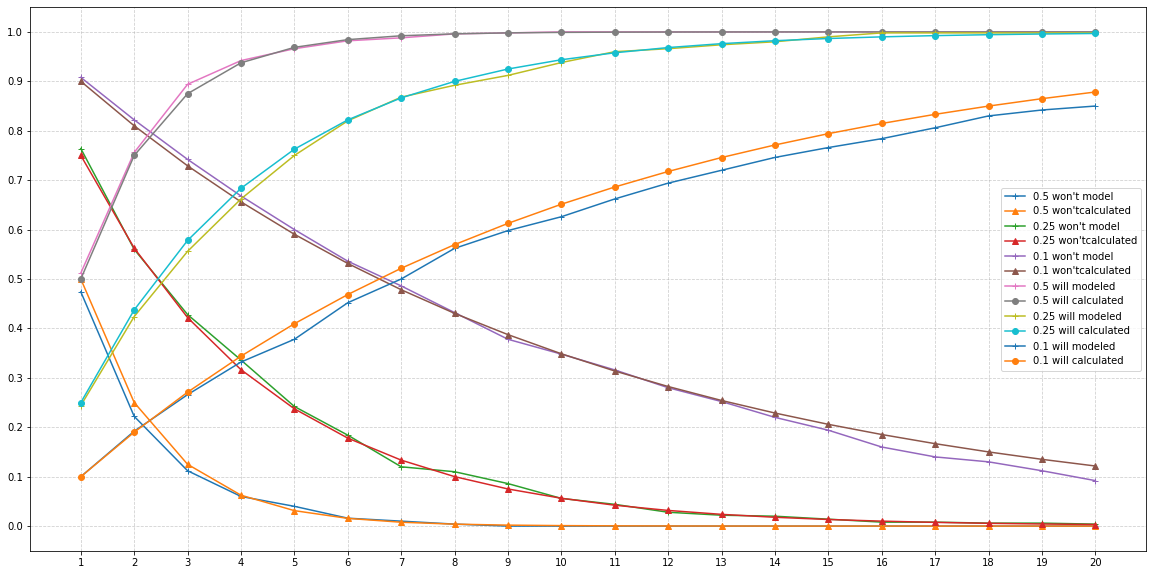

In [3]:
'''
Plotting is from examples athttps://www.geeksforgeeks.org/plot-mathematical-expressions-in-python-using-matplotlib/
'''

count = 20									# Number of events to check
x = np.arange(1,count+1,1)	# X axis of events [1,count]

 
fig = plt.figure(figsize = (20, 10))
# Plot condition not met
for p in (0.5, 0.25, 0.1):
	plt.plot(x, wont_model(p, count), "+-", label=f"{p} won't model")
	plt.plot(x, wont_calculated(p, count), "^-", label=f"{p} won'tcalculated")

# Plot condition being met 
for p in (0.5, 0.25, 0.1):
	plt.plot(x, will_model(p, count), "+-", label=f"{p} will modeled")
	plt.plot(x, will_calculated(p, count), "o-", label=f"{p} will calculated")

plt.grid(alpha =.6, linestyle ='--') 
plt.yticks(np.linspace(0,1,11))
plt.xticks(x)
plt.legend()
# Show the plot
plt.show()